# 2 csatornás képek

In [ ]:
#2 csatornás kép betöltése

import matplotlib.pyplot as plt
from skimage import io
import numpy as np


#load
path="data/single/JNK1B2_1.tif"
img = io.imread(path)
#load részeként: ellenőrzi, hogy a channelek milyen sorrendben vannak, és rendezi
if img.shape[0] <6:
    img = np.swapaxes(img, 0, 2)
    img = np.swapaxes(img, 0, 1)
if img.shape[1] <6:
    img = np.swapaxes(img, 1, 2)


#print
channels=img.shape[-1]

for i in range(channels):
    plt.subplot(1, channels, i+1)
    plt.imshow(img[:,:,i], cmap="gray") 
    plt.axis("off")
    
    
print(img.shape)

In [ ]:
#2 csatornás kép betöltése class segítségével 2 képre

from Classes import cellImageAnalysis as ca
import matplotlib.pyplot as plt
from skimage import io

img = ca.Image("data/single/JNK1B2_1.tif", ["Nuclei", "Plasma"])
img.load_image()
img.display_image()

# sejtkontúrok

In [ ]:
#példa a sejtek kontúrjának megtalálásához

import matplotlib.pyplot as plt
from skimage import io
import numpy as np
from Classes import cellImageAnalysis as ca
from skimage.morphology import erosion
from skimage.morphology import disk  # szükséges az erosion mértékéhez

path="data/single/JNK1B2_1.tif"

img = ca.Image(path)
img.load_image()
detector = ca.Detector(cell_channel=0)
labels = detector.detect_cells(img.image)

footprint = disk(5)
#footprint számadat megadja a membrán vastagságát

cellb=[[]]
#betesszük egy listába az adott sejtet
#kivonjuk belőle az erodált mását (true-fals miatt boolean operátor!)

for i in range(labels.max()):
    cellb[i]=labels==i
    cellb[i]= cellb[i]^erosion(labels==i,footprint)
    break

#a listákat numpy array-é alakítjuk
#shape varázslás
cellb=np.array(cellb)
cellb = np.swapaxes(cellb, 0, 2)
cellb = np.swapaxes(cellb, 0, 1)

#kirajzolás
plt.axis("off")
plt.imshow(cellb)

In [ ]:
#a probálkozások során kellett
#probléma vizualizálása a szétbontott sejtek kontúrjának megalkotása előtt

from Classes import cellImageAnalysis as ca
import matplotlib.pyplot as plt

path="data/single/JNK1B2_1.tif"

img = ca.Image(path)
img.load_image()
detector = ca.Detector(cell_channel=0)
labels = detector.detect_cells(img.image)


for i in range(labels.max()):
    plt.rcParams['figure.figsize'] = [6,6]
    plt.subplot(5, labels.max()-24, i+1)
    plt.imshow(labels==i+1)
    plt.axis("off")

# 3 képből 1

In [ ]:
#3 képből egy, sajnos a külön csatornákat nem tudtam megcsinálni / nem látom át hogyan alakul ki a 3d array
#de a képek kifejezetten szépek, részletgazadok!

from Classes import cellImageAnalysis as ca        
     
#a=ca.XpressImage("data/230309","A04_s45")
a=ca.XpressImage("data/230309","A04_s47")
a.load_ximage()
a.display_ximage()

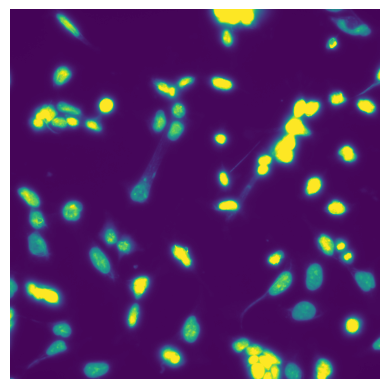

In [6]:
#új kezdet

from os import listdir
from os.path import isfile, join
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

path="data/230309"
place="A04_s47"

 #leszűrjük, hogy a mappából csak a tif file-okat vizsgáljuk
tifs = [f for f in listdir(path) if isfile(join(path, f)) and  f.endswith(".tif")]

#majd kiválasztjuk belőle a megadott hely alapján a megfelelő fileokat
matches = [match for match in tifs if place in match]

#teljes elérési utat hozunk létre a fileokhoz, 
for i in range(len(matches)):
    matches[i]=join(path,matches[i])

#létrehozunk egy img arrayt, majd egyesével hozzáadjuk a külön képeket
img=np.array(0)
for i in matches:
    img=img+io.imread(i)-io.imread(i).min() #mindenhonnan levonjuk a hátteret egyesével, mivel a külön képeken eltérhet
img=np.clip(img, 0, img.max()/3)                    

#kirajzolás
plt.axis("off")
plt.imshow(img)


# misc

In [ ]:
#classok megértéséhez segédlet

class Animal:
    
    def __init__(self, birth_date):
        self.birth_date = birth_date
        self.position = 0
        
    def get_age(self):
        return 10
    
    def move(self):
        self.position += 1
        
class Cow(Animal):
    
    def __init__(self, birth_date, milk=None):
        super().__init__(birth_date)
    
    def moo(self):
        print("Moooooo")
        
    def get_age(self):
        return 3